In [1]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib

In [2]:
#To download the file locally
#import urllib
#url = "https://covid.ourworldindata.org/data/ecdc/full_data.csv"
#urllib.request.urlretrieve (url, "data/full_data.csv")

In [3]:
data = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv')


In [4]:
print(data.head())


         date     location  new_cases  new_deaths  total_cases  total_deaths
0  2019-12-31  Afghanistan          0           0            0             0
1  2020-01-01  Afghanistan          0           0            0             0
2  2020-01-02  Afghanistan          0           0            0             0
3  2020-01-03  Afghanistan          0           0            0             0
4  2020-01-04  Afghanistan          0           0            0             0


In [5]:
print(data.dtypes)

date            object
location        object
new_cases        int64
new_deaths       int64
total_cases      int64
total_deaths     int64
dtype: object


In [6]:
#dateFormat = '%Y-%m-%d'
# Convert string values of date to datetime format
data['date'] = [dt.datetime.strptime(x,'%Y-%m-%d') for x in data['date']] 
#print(data.dtypes)

In [7]:
#Let's look at multiple countries
countries=['United States','Brazil']
data_country = data[data.location.isin(countries)]  #Create subset data frame for select countries

In [12]:
data_country.head()

,location,new_cases,new_deaths,total_cases,total_deaths,mortality_rate
date,,,,,,
2019-12-31,Brazil,0,0,0,0,NaN
2020-01-01,Brazil,0,0,0,0,NaN
2020-01-02,Brazil,0,0,0,0,NaN
2020-01-03,Brazil,0,0,0,0,NaN
2020-01-04,Brazil,0,0,0,0,NaN


In [13]:
data_country.tail()

,location,new_cases,new_deaths,total_cases,total_deaths,mortality_rate
date,,,,,,
2020-06-25,United States,34339,751,2381361,121979,0.051222
2020-06-26,United States,40949,2437,2422310,124416,0.051363
2020-06-27,United States,45527,623,2467837,125039,0.050667
2020-06-28,United States,42486,500,2510323,125539,0.050009
2020-06-29,United States,38673,265,2548996,125804,0.049354


In [8]:
data_country.set_index('date', inplace=True)  #Make date the index for easy plotting



In [9]:
#To create subset range based on dates
#data_country = data_country.loc['2020-02-15':'2020-03-22']

#print(data_country.tail())  #Check the last date 

In [15]:
#To calculate mortality rate
data_country['mortality_rate'] = data_country['total_deaths']/data_country['total_cases']
data_country.tail()

/Users/shovitraj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,new_cases,new_deaths,total_cases,total_deaths,mortality_rate
date,,,,,,
2020-06-25,United States,34339,751,2381361,121979,0.051222
2020-06-26,United States,40949,2437,2422310,124416,0.051363
2020-06-27,United States,45527,623,2467837,125039,0.050667
2020-06-28,United States,42486,500,2510323,125539,0.050009
2020-06-29,United States,38673,265,2548996,125804,0.049354


In [19]:
data_country.groupby('location')['new_cases']

date
2019-12-31    0
2020-01-01    0
2020-01-02    0
2020-01-03    0
2020-01-04    0
2019-12-31    0
2020-01-01    0
2020-01-02    0
2020-01-03    0
2020-01-04    0
Name: new_cases, dtype: int64

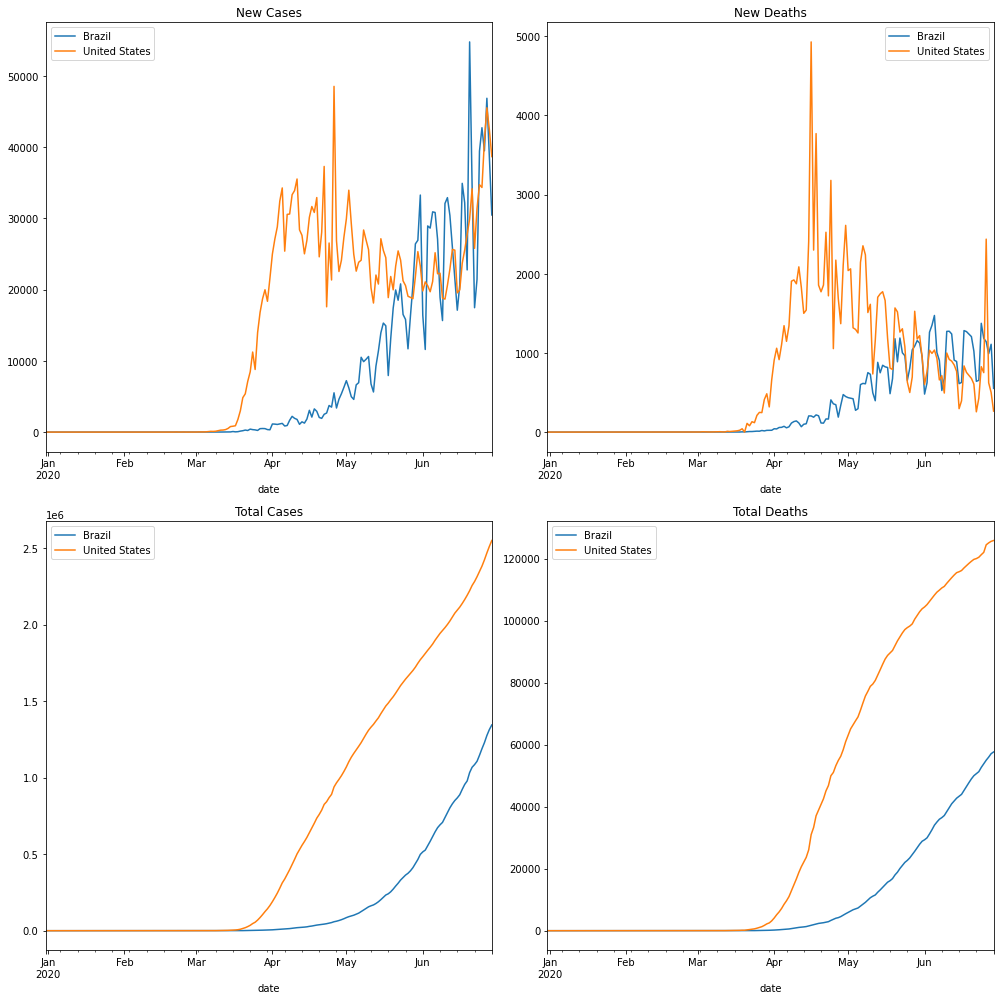

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,14))


data_country.groupby('location')['new_cases'].plot(ax=axes[0,0], legend=True) 
data_country.groupby('location')['new_deaths'].plot(ax=axes[0,1], legend=True)
data_country.groupby('location')['total_cases'].plot(ax=axes[1,0], legend=True)
data_country.groupby('location')['total_deaths'].plot(ax=axes[1,1], legend=True)
#CVD_country.groupby('location')['mortality_rate'].plot(ax=axes[1,1], legend=True)
#CVD_country.to_csv('data/output.csv')

axes[0, 0].set_title("New Cases")
axes[0, 1].set_title("New Deaths")
axes[1, 0].set_title("Total Cases")
axes[1, 1].set_title("Total Deaths")


fig.tight_layout()  # adjust subplot parameters to give specified padding.